In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
log_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/Log/'
out_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/Plots/'
models = os.listdir(log_dir)
print(models)

['subject_1_layer_norm', 'subject_2_baseline2', 'test_ms3', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'subs_1_2_5_7', 'subject_2_lstm_layer_norm', 'subject_2_layer_norm', 'subject_2_both_layer_norm']


In [155]:
data = {}
for m in models:
    data[m] = pd.read_csv(f'{log_dir}/{m}/loss_history.csv')
    data[m] = pd.read_csv(f'{log_dir}/{m}/loss_history.csv')
    data[m] = pd.read_csv(f'{log_dir}/{m}/loss_history.csv')
print(data.keys())

dict_keys(['subject_1_layer_norm', 'subject_2_baseline2', 'subject_2_attn_layer_norm', 'subject_2_dense_layer_norm', 'subject_1_and_2', 'subject_2_lstm_layer_norm', 'subject_2_layer_norm', 'subject_2_both_layer_norm'])


In [4]:
def get_loss(df, key='val_loss') -> list:
    loss = df.dropna(subset=[key]).groupby('epoch')[key].apply(list)
    return [loss[i][-1] for i in range(len(loss))]

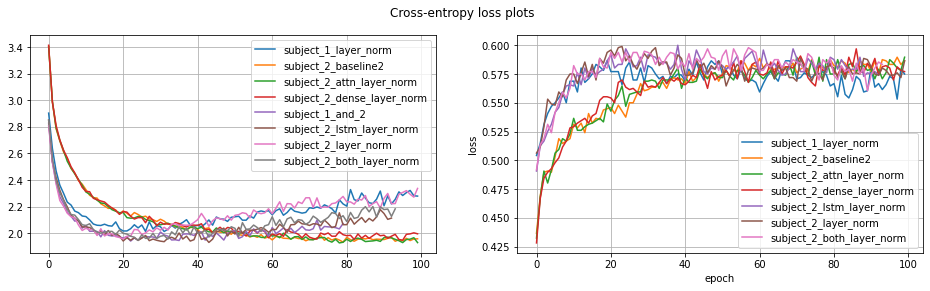

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

for i, (k, v) in enumerate(data.items()):
    ax[0].plot( get_loss(v, 'val_loss'), label=k )
    ax[0].grid('on')

ax[0].legend()

for i, (k, v) in enumerate(data.items()):
    try:
        ax[1].plot( get_loss(v, 'val_accuracy'), label=k)
        ax[1].grid('on')
    except KeyError:
        pass
    
plt.suptitle("Cross-entropy loss plots")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xlim(xmin = -(.05 * plt.gca().get_xlim()[1]))
plt.legend()
# plt.grid()
# plt.savefig(f"{out_dir}/loss_plot.png")
plt.show()

1.941145896911621
1.9309128522872925


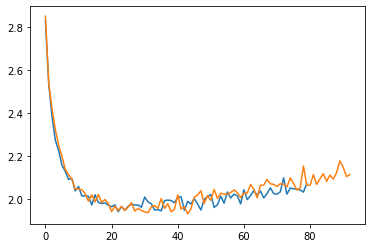

In [162]:
x = get_loss(data['subject_1_and_2'], 'val_loss')
print(min(x))
y = get_loss(data['subject_2_lstm_layer_norm'], 'val_loss')
print(min(y))
plt.plot(x)
plt.plot(y)
plt.show()

In [6]:
df = pd.read_csv(f'{log_dir}/subs_1_2_5_7/loss_history.csv')

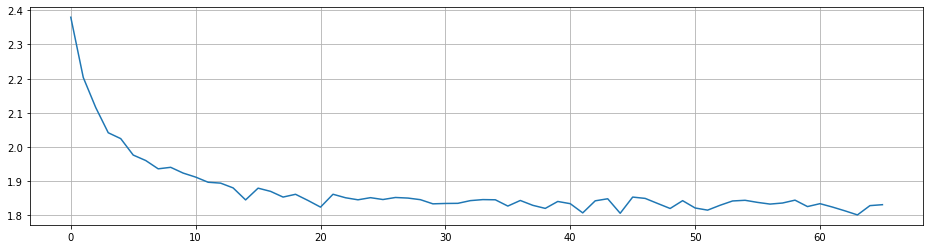

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16,4))

ax.plot( get_loss(df, 'val_loss') )
ax.grid('on')
plt.show()